In [1]:
import os
import os.path as op
import mne
# change to qt for interactive plots
%matplotlib inline

In [2]:
# config
baseline = (None, 0)
meg_dir = '../MEG'
subjects_dir = '../subjects'
os.environ["SUBJECTS_DIR"] = subjects_dir

Reading ../MEG/grand_average-ave.fif ...
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (aud_left)
        0 CTF compensation matrices available
        nave = 52 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (aud_right)
        0 CTF compensation matrices available
        nave = 59 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (vis_left)
        0 CTF compensation matrices available
        nave = 63 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (vis_right)
        0 CTF compensation 

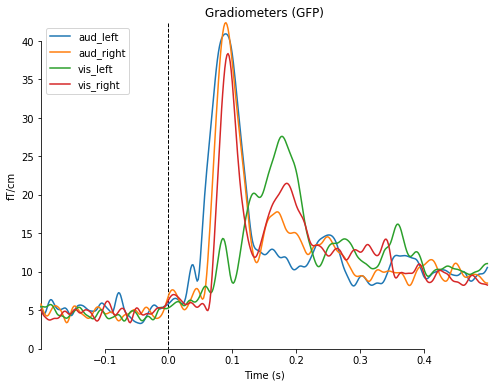

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


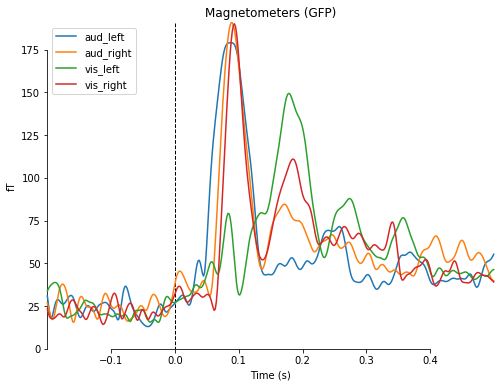

[<Figure size 576x432 with 1 Axes>, <Figure size 576x432 with 1 Axes>]

In [3]:
evokeds = mne.read_evokeds(op.join(meg_dir, 'grand_average-ave.fif'))

# Baseline correction
for evoked in evokeds:
    evoked.apply_baseline(baseline=baseline)

mapping = {
    'aud_left': evokeds[0],
    'aud_right': evokeds[1],
    'vis_left': evokeds[2],
    'vis_right': evokeds[3]
}

mne.viz.plot_compare_evokeds(mapping)

In [4]:
# Source space contrast
stc_aud = mne.read_source_estimate(
    op.join(meg_dir, 'aud_left_minus_right-grand_average-ave-stc'))
# mayavi provides better visualization
# stc_aud.plot(hemi='lh', initial_time=0.1)
stc_aud.magnitude().plot(hemi='lh', initial_time=0.1, backend='matplotlib')

Using control points [1.96142929 2.29292423 7.53769112]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from ../subjects/fsaverage/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
    10 smooth iterations done.


Using control points [ 2.93174211  3.60761569 13.6637063 ]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from ../subjects/fsaverage/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
    10 smooth iterations done.


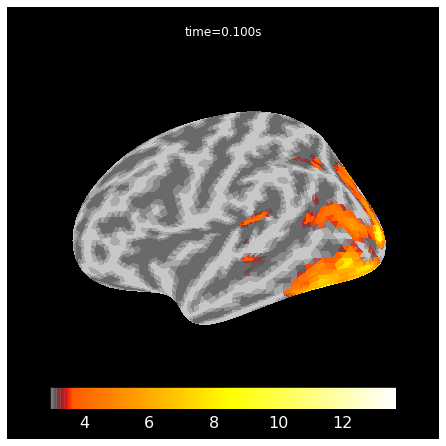

In [5]:
stc_vis = mne.read_source_estimate(
    op.join(meg_dir, 'vis_left_minus_right-grand_average-ave-stc'))
stc_vis.magnitude().plot(hemi='lh', initial_time=0.1, backend='matplotlib')